In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('car_price_features.csv')
df.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,13495.0
1,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,16500.0
2,0.822681,0.909722,2823,152,154,19,26,94.5,2.68,rwd,16500.0
3,0.848630,0.919444,2337,109,102,24,30,99.8,3.19,fwd,13950.0
4,0.848630,0.922222,2824,136,115,18,22,99.4,3.19,4wd,17450.0


In [4]:
# working with linear regression
lm = LinearRegression()
X = df[['city-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381,
       19305.44280105])

(0.0, 53417.73180230009)

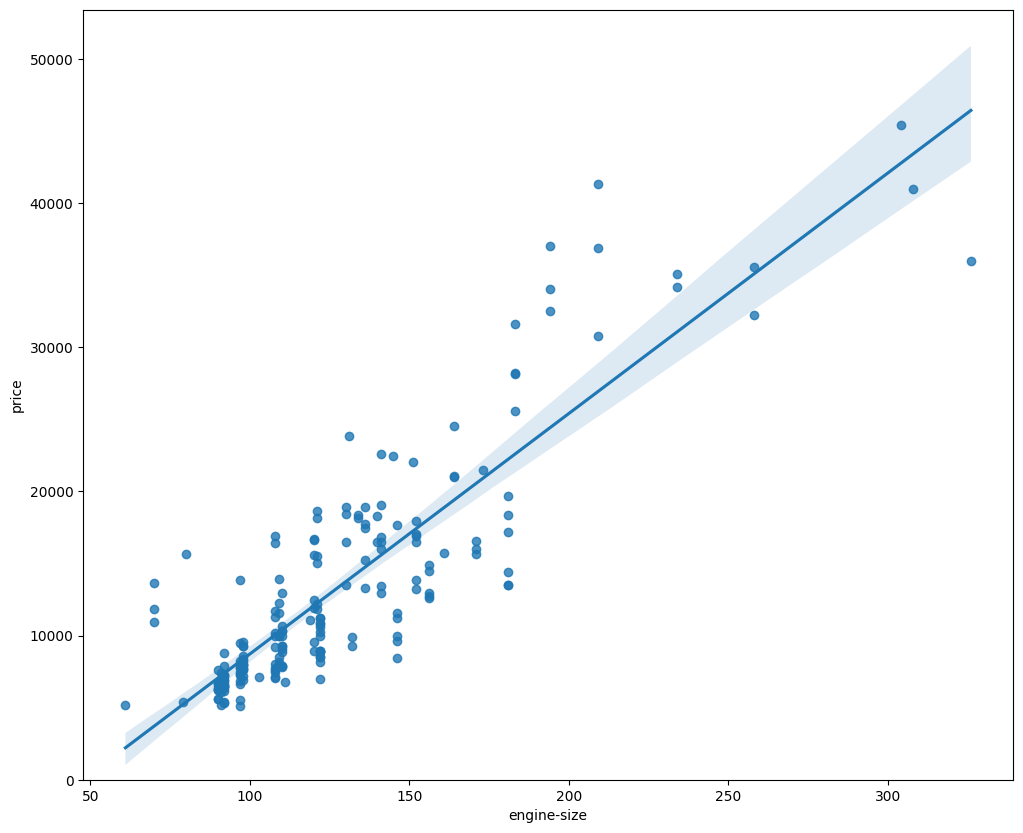

In [5]:
#using visualization
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [6]:
#multiple linear regression
h = df[['engine-size', 'curb-weight', 'horsepower']]
lm.fit(h, df['price'])
lm.intercept_, lm.coef_

(-13777.929120501969, array([83.85401973,  4.40121218, 49.30221602]))

/tmp/ipykernel_6161/1872612232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
/tmp/ipykernel_6161/1872612232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color='b', label='Fitted Value

<Axes: xlabel='price', ylabel='Density'>

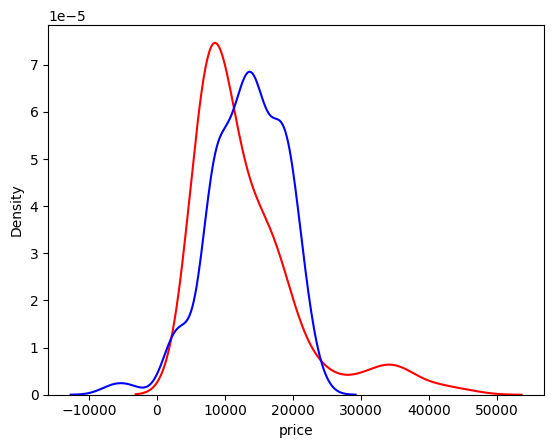

In [7]:
axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=axl)

In [8]:
#city_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.4713797473570377
The mean square error of price and predicted value is:  33219371.63106507


In [9]:
# BASED ON THE ANALYSIS PART OF THIS NOTEBOOK SERIES WE PICKED THE FEATURES WITH THE HIGHEST CORRELATION
x = df[['horsepower', 'curb-weight', 'engine-size']].values
y = df.price

# splitting the dataset into training and testing values.
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state = 1)

In [12]:
scores=cross_val_score(lm, X, Y, cv=3)
np.mean(scores)

0.3643565950246188